# Project: Investigate the 'No Show Appointment' Dataset 
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>
> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.

In [5]:
#import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#read dataset
raw = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [4]:
#check out the dataset
raw.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
#check what's the data type for each column
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [24]:
#change data types for columns
raw[['Age']]= raw[['Age']].astype(float)

raw['Age'].dtypes

dtype('float64')

In [17]:
raw['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

In [7]:
raw['Neighbourhood'].unique()

array(['JARDIM DA PENHA', 'MATA DA PRAIA', 'PONTAL DE CAMBURI',
       'REPÚBLICA', 'GOIABEIRAS', 'ANDORINHAS', 'CONQUISTA',
       'NOVA PALESTINA', 'DA PENHA', 'TABUAZEIRO', 'BENTO FERREIRA',
       'SÃO PEDRO', 'SANTA MARTHA', 'SÃO CRISTÓVÃO', 'MARUÍPE',
       'GRANDE VITÓRIA', 'SÃO BENEDITO', 'ILHA DAS CAIEIRAS',
       'SANTO ANDRÉ', 'SOLON BORGES', 'BONFIM', 'JARDIM CAMBURI',
       'MARIA ORTIZ', 'JABOUR', 'ANTÔNIO HONÓRIO', 'RESISTÊNCIA',
       'ILHA DE SANTA MARIA', 'JUCUTUQUARA', 'MONTE BELO',
       'MÁRIO CYPRESTE', 'SANTO ANTÔNIO', 'BELA VISTA', 'PRAIA DO SUÁ',
       'SANTA HELENA', 'ITARARÉ', 'INHANGUETÁ', 'UNIVERSITÁRIO',
       'SÃO JOSÉ', 'REDENÇÃO', 'SANTA CLARA', 'CENTRO', 'PARQUE MOSCOSO',
       'DO MOSCOSO', 'SANTOS DUMONT', 'CARATOÍRA', 'ARIOVALDO FAVALESSA',
       'ILHA DO FRADE', 'GURIGICA', 'JOANA D´ARC', 'CONSOLAÇÃO',
       'PRAIA DO CANTO', 'BOA VISTA', 'MORADA DE CAMBURI', 'SANTA LUÍZA',
       'SANTA LÚCIA', 'BARRO VERMELHO', 'ESTRELINHA', 'FORTE SÃO 

In [10]:
raw['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [29]:
raw['SMS_received'].value_counts()

0    75044
1    35482
Name: SMS_received, dtype: int64

In [30]:
raw['Scholarship'].value_counts()

0    99665
1    10861
Name: Scholarship, dtype: int64

In [31]:
raw['Hipertension'].value_counts()

0    88725
1    21801
Name: Hipertension, dtype: int64

In [32]:
raw['Diabetes'].value_counts()

0    102583
1      7943
Name: Diabetes, dtype: int64

In [33]:
raw['Alcoholism'].value_counts()

0    107166
1      3360
Name: Alcoholism, dtype: int64

In [34]:
raw['Handcap'].value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [29]:
raw['Attendance'] = np.where(raw['No-show']=='No', 1, 2)
raw.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Attendance
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,1
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,1
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,1
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,1


In [11]:
# look at age
raw['Age'].value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
 56     1635
 38     1629
 59     1624
 2      1618
 50     1613
 57     1603
 36     1580
 51     1567
 19     1545
 39     1536
 37     1533
 54     1530
 34     1526
 33     1524
 30     1521
 6      1521
 3      1513
 17     1509
 32     1505
 5      1489
 44     1487
 18     1487
 58     1469
 46     1460
 45     1453
        ... 
 74      602
 76      571
 75      544
 78      541
 77      527
 80      511
 81      434
 82      392
 79      390
 84      311
 83      280
 85      275
 86      260
 87      184
 89      173
 88      126
 90      109
 92       86
 91       66
 93       53
 94       33
 95       24
 96       17
 97       11
 98        6
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

In [25]:
#remove -1 age
raw = raw.query('Age>=0')

In [26]:
# look at age again
raw['Age'].value_counts()

0.0      3539
1.0      2273
52.0     1746
49.0     1652
53.0     1651
56.0     1635
38.0     1629
59.0     1624
2.0      1618
50.0     1613
57.0     1603
36.0     1580
51.0     1567
19.0     1545
39.0     1536
37.0     1533
54.0     1530
34.0     1526
33.0     1524
30.0     1521
6.0      1521
3.0      1513
17.0     1509
32.0     1505
5.0      1489
44.0     1487
18.0     1487
58.0     1469
46.0     1460
45.0     1453
         ... 
72.0      615
74.0      602
76.0      571
75.0      544
78.0      541
77.0      527
80.0      511
81.0      434
82.0      392
79.0      390
84.0      311
83.0      280
85.0      275
86.0      260
87.0      184
89.0      173
88.0      126
90.0      109
92.0       86
91.0       66
93.0       53
94.0       33
95.0       24
96.0       17
97.0       11
98.0        6
115.0       5
100.0       4
102.0       2
99.0        1
Name: Age, Length: 103, dtype: int64

(array([  1.99440000e+04,   1.47320000e+04,   1.69490000e+04,
          1.59600000e+04,   1.86750000e+04,   1.41370000e+04,
          7.27700000e+03,   2.61000000e+03,   2.37000000e+02,
          5.00000000e+00]),
 array([   0. ,   11.5,   23. ,   34.5,   46. ,   57.5,   69. ,   80.5,
          92. ,  103.5,  115. ]),
 <a list of 10 Patch objects>)

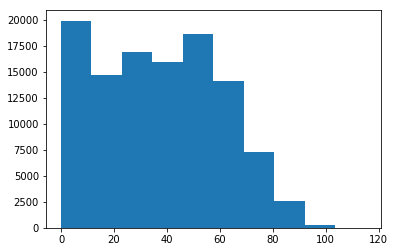

In [27]:
plt.hist(raw['Age'])

(array([ 88207.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  22319.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

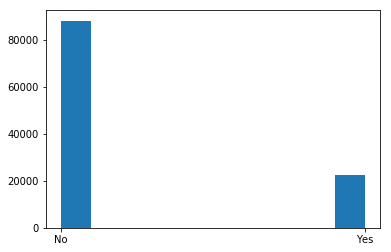

In [28]:
plt.hist(raw['No-show'])

In [ ]:
ax = plt.subplot(111)
ax.bar(x-0.2, y,width=0.2,color='b',align='center')
ax.bar(x, z,width=0.2,color='g',align='center')
ax.bar(x+0.2, k,width=0.2,color='r',align='center')
ax.xaxis_date()

In [37]:
# get counts for each rating and color
color_counts = raw.groupby(['No-show','Gender']).count()['PatientId']
color_counts

No-show  Gender
No       F         57245
         M         30962
Yes      F         14594
         M          7725
Name: PatientId, dtype: int64

In [ ]:
#array(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
#       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship',
#       'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received',
#       'No-show'], dtype=object)

# get proportions by dividing red rating counts by total # of red samples
gen = color_counts['red'] / color_totals['red']
red_proportions

In [ ]:
# get proportions by dividing total yes counts by total # of Gender
red_proportions = color_counts['red'] / color_totals['red']
red_proportions

In [ ]:
# plot bars
red_bars = plt.bar(ind, red_proportions, width, color='r', alpha=.7, label='Red Wine')
white_bars = plt.bar(ind + width, white_proportions, width, color='w', alpha=.7, label='White Wine')

# title and labels
plt.ylabel('Proportion')
plt.xlabel('Quality')
plt.title('Proportion by Wine Color and Quality')
locations = ind + width / 2  # xtick locations
labels = ['3', '4', '5', '6', '7', '8', '9']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend()

In [30]:
y1=raw['Attendance'].value_counts()
y1.head(n=20)

1    88208
2    22319
Name: Attendance, dtype: int64

In [26]:
y2=raw['SMS_received']
y2.head(n=20)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    1
12    0
13    0
14    0
15    1
16    0
17    0
18    1
19    0
Name: SMS_received, dtype: int64

In [11]:
raw.columns.values

array(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship',
       'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received',
       'No-show'], dtype=object)